# ¡Hola, Alejandro!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats as st
import math as mth

# Paso 1

In [2]:
productos = pd.read_csv("/datasets/logs_exp_us.csv", sep='\t')

# Paso 2

In [3]:
productos.drop_duplicates()
productos = productos.dropna() 

print("\nValores faltantes en cada columna:")
print(productos.isnull().sum())
    
print("\nNúmero de duplicados:")
print(productos.duplicated().sum())

productos.info()
productos.head()


Valores faltantes en cada columna:
EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

Número de duplicados:
413
<class 'pandas.core.frame.DataFrame'>
Int64Index: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 9.3+ MB


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
productos.columns = ['Evento', 'ID', 'Hora', 'IdExperimento']
productos['Hora'] = pd.to_datetime(productos['Hora'], unit='s')

productos['Fecha'] = productos['Hora'].dt.date
productos['Hora'] = productos['Hora'].dt.time

productos.head()

,Evento,ID,Hora,IdExperimento,Fecha
0,MainScreenAppear,4575588528974610257,04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,11:48:42,248,2019-07-25


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo leyendo los datos
</div>

# Paso 3

In [5]:
#¿Cuántos eventos hay en los registros?
productos["Evento"].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [6]:
x_evento = productos["Evento"].count()
print(x_evento)

244126


In [7]:
#¿Cuántos usuarios y usuarias hay en los registros?
x_usuario = productos["ID"].nunique()
print(x_usuario)

7551


In [8]:
#¿Cuál es el promedio de eventos por usuario?
eventoxid = x_evento / x_usuario
print(eventoxid)

32.33028737915508


In [9]:
#¿Qué periodo de tiempo cubren los datos? 
fecha_max = print(productos["Fecha"].max())
fecha_min = print(productos["Fecha"].min())

2019-08-07
2019-07-25


2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: Fecha, dtype: int64


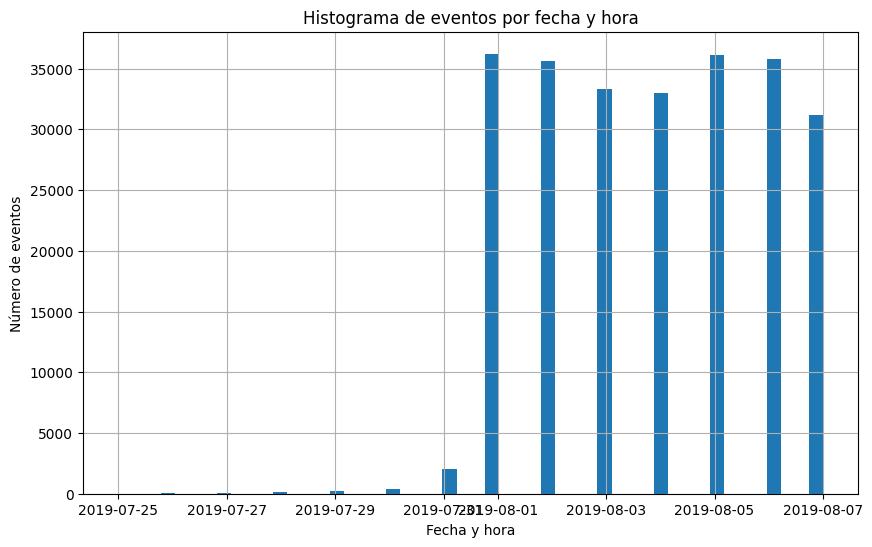

In [10]:
#¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?
## Para todo el periodo no tenemos completos igualmente los datos.
eventos_por_dia = productos['Fecha'].value_counts().sort_index()
print(eventos_por_dia)

plt.figure(figsize=(10, 6))
productos['Fecha'].hist(bins=50)
plt.title('Histograma de eventos por fecha y hora')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de eventos')
plt.show()

In [11]:
# ¿Qué periodo representan realmente los datos?
### Desde 2019-08-01 al 2019-08-07

# ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
### Pese a que correspondel al mes 7, no fueron muchos los eventos y usuarios perdidos en comparacion con el mes 8.

# Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.
fecha_completa_inicio = pd.to_datetime('2019-08-01')

productos = productos[productos['Fecha'] >= fecha_completa_inicio]

print(productos['Fecha'].min())
print(productos['Fecha'].max())
print()

y_evento = productos["Evento"].count()
datos_perdidos = x_evento - y_evento
print(datos_perdidos)

2019-08-01
2019-08-07

2828


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
    
Conclusiones? cuantos datos perdimos?
</div>

<div class="alert alert-block alert-info">
<b>Perdimos 2828 filas de informacion al ignorar informacion del mes 7 que no poseia la misma cantidad de info en comparacion al mes 8. Por lo tanto, para seguir con los siguientes pasos, usaremos la misma. Puede ser que para el periodo 7 los grupo de control no tenian tanta info por ser una empresa emergente.  </b> <a class="tocSkip"></a>
</div>

# Paso 4

In [12]:
#Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
frecuencia = productos['Evento'].value_counts().reset_index()
frecuencia.columns = ['Evento', 'Frecuencia']

frecuencia_ordenada = frecuencia.sort_values(by='Frecuencia', ascending=False)
print(frecuencia_ordenada)

                    Evento  Frecuencia
0         MainScreenAppear      117431
1       OffersScreenAppear       46350
2         CartScreenAppear       42365
3  PaymentScreenSuccessful       34113
4                 Tutorial        1039


In [13]:
#Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. 
#Ordena los eventos por el número de usuarios y usuarias. 
usuario_x_evento = productos.groupby('Evento')['ID'].nunique().reset_index()
usuario_x_evento.columns = ['Evento', 'ConteoUsuario']

usuario_x_evento_x = usuario_x_evento.sort_values(by='ConteoUsuario', ascending=False)
print(usuario_x_evento_x)

                    Evento  ConteoUsuario
1         MainScreenAppear           7419
2       OffersScreenAppear           4593
0         CartScreenAppear           3734
3  PaymentScreenSuccessful           3539
4                 Tutorial            840


In [14]:
#Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.
total_usuarios = productos['ID'].nunique()
usuario_x_evento['ProporcionUsuario'] = usuario_x_evento['ConteoUsuario'] / total_usuarios

print(usuario_x_evento.sort_values(by='ProporcionUsuario', ascending=False))

                    Evento  ConteoUsuario  ProporcionUsuario
1         MainScreenAppear           7419           0.984736
2       OffersScreenAppear           4593           0.609636
0         CartScreenAppear           3734           0.495620
3  PaymentScreenSuccessful           3539           0.469737
4                 Tutorial            840           0.111495


{'MainScreenAppear -> OffersScreenAppear': 0.6190861302062273, 'OffersScreenAppear -> CartScreenAppear': 0.8129762682342695, 'CartScreenAppear -> PaymentScreenSuccessful': 0.9477771826459561}



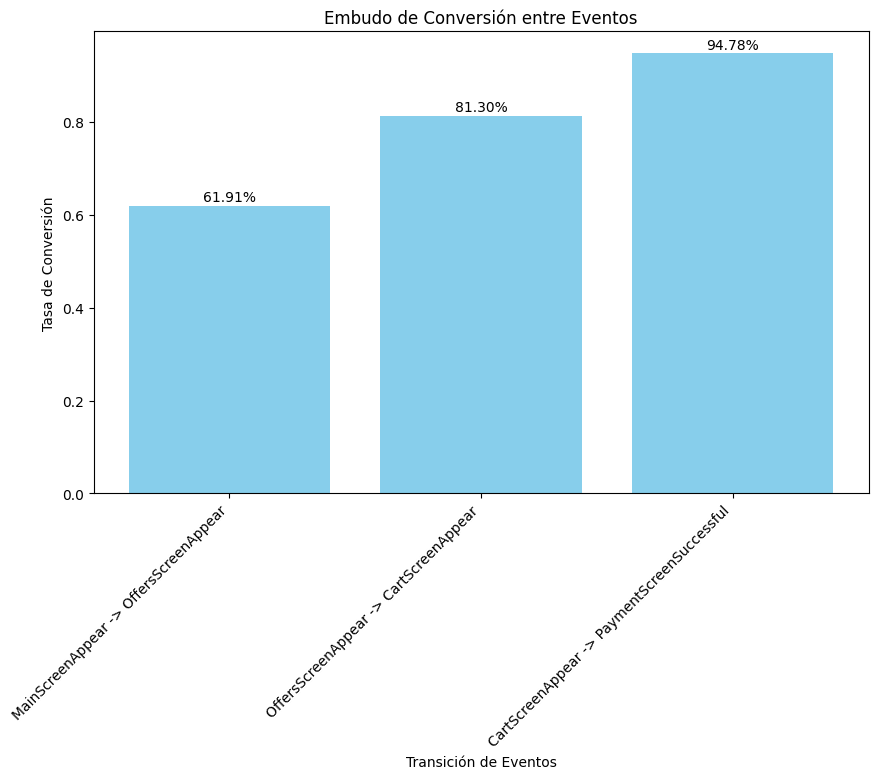

In [15]:
#Embudo
secuencia_evento = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

embudo = {}
for i in range(len(secuencia_evento) - 1):
    evento_1 = secuencia_evento[i]
    proximo_evento = secuencia_evento[i + 1]

    comienzo_usuario = productos[productos['Evento'] == evento_1]['ID'].nunique()
    proximo_usuario = productos[productos['Evento'] == proximo_evento]['ID'].nunique()

    embudo[f'{evento_1} -> {proximo_evento}'] = proximo_usuario / comienzo_usuario

print(embudo)
print()

etapas = list(embudo.keys())
conversiones = list(embudo.values())

plt.figure(figsize=(10, 6))
plt.bar(etapas, conversiones, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Embudo de Conversión entre Eventos')
plt.xlabel('Transición de Eventos')
plt.ylabel('Tasa de Conversión')

for i, v in enumerate(conversiones):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center')

plt.show()

La mayor pérdida de usuarios ocurre en la primera etapa: MainScreenAppear -> OffersScreenAppear

MainScreenAppear -> OffersScreenAppear: pérdida del 38.1%
OffersScreenAppear -> CartScreenAppear: pérdida del 18.7%
CartScreenAppear -> PaymentScreenSuccessful: pérdida del 5.2%

In [16]:
#Completan todo el proceso
evento_final = secuencia_evento[-1]
usuario_1 = productos[productos['Evento'] == secuencia_evento[0]]['ID'].nunique()
usuario_final = productos[productos['Evento'] == evento_final]['ID'].nunique()

completa = usuario_final / usuario_1
print(f"Porcentaje de usuarios que completan todo el proceso: {completa * 100:.2f}%")

Porcentaje de usuarios que completan todo el proceso: 47.70%


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
Gráfico del embudo? conclusiones?
</div>

<div class="alert alert-block alert-info">
<b>El porcentaje de usuarios que completan todo el proceso es cercano a la mitad del total de usuarios que ingresan a la pagina, el total de los usuarios que abandonan el sitio web ocurre en la primera etapa del dataset por lo que concluiremos que hace falta realizar un mecanismo y/o idea para retener a los mismos para que pueden avanzar al siguientre paso y asi aumentar nuestro porcentaje de usuarios que completen en su totalidad todo el proceso descrito.</b> <a class="tocSkip"></a>
</div>

# Paso 5

In [17]:
#¿Cuántos usuarios y usuarias hay en cada grupo?
usuario_x_grupo = productos.groupby('IdExperimento')['ID'].nunique().reset_index()
usuario_x_grupo.columns = ['IdExperimento', 'ConteoUsuario']
print(usuario_x_grupo)

   IdExperimento  ConteoUsuario
0            246           2484
1            247           2513
2            248           2537


In [18]:
evento_popular = productos['Evento'].value_counts().idxmax()
print(f"El evento más popular es: {evento_popular}")

El evento más popular es: MainScreenAppear


<div class="alert alert-block alert-info">
<b>Comparar si hay una diferencia significativa en la proporción de usuarios que experimentaron este evento entre los grupos de control 246 y 247.</b> <a class="tocSkip"></a>
</div>

In [19]:
grupo_246 = productos[(productos['IdExperimento'] == 246) & (productos['Evento'] == evento_popular)]
grupo_247 = productos[(productos['IdExperimento'] == 247) & (productos['Evento'] == evento_popular)]

exitos_246 = grupo_246['ID'].nunique()
exitos_247 = grupo_247['ID'].nunique()

usuarios_246 = productos[productos['IdExperimento'] == 246]['ID'].nunique()
usuarios_247 = productos[productos['IdExperimento'] == 247]['ID'].nunique()

exitos = [exitos_246, exitos_247]
n = [usuarios_246, usuarios_247]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: 0.3093
P-valor: 0.7571
No hay una diferencia estadísticamente significativa entre los dos grupos.


<div class="alert alert-block alert-info">
<b>En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción.</b> <a class="tocSkip"></a>
</div>

In [20]:
grupo_246 = productos[(productos['IdExperimento'] == 246) & (productos['Evento'] == "MainScreenAppear")]
grupo_247 = productos[(productos['IdExperimento'] == 247) & (productos['Evento'] == "MainScreenAppear")]

usuarios_246 = grupo_246['ID'].nunique()
usuarios_247 = grupo_247['ID'].nunique()

print(f"Cantidad de usuarios/as en el grupo 246 que realizaron 'MainScreenAppear': {usuarios_246}")
print(f"Cantidad de usuarios/as en el grupo 247 que realizaron 'MainScreenAppear': {usuarios_247}")

Cantidad de usuarios/as en el grupo 246 que realizaron 'MainScreenAppear': 2450
Cantidad de usuarios/as en el grupo 247 que realizaron 'MainScreenAppear': 2476


<div class="alert alert-block alert-info">
<b>Encontrar su proporcion.</b> <a class="tocSkip"></a>
</div>

In [21]:
total_usuarios_246 = productos[productos['IdExperimento'] == 246]['ID'].nunique()
total_usuarios_247 = productos[productos['IdExperimento'] == 247]['ID'].nunique()

proporcion_246 = usuarios_246 / total_usuarios_246
proporcion_247 = usuarios_247 / total_usuarios_247

print(f"Proporción de usuarios/as en el grupo 246 que realizaron 'MainScreenAppear': {proporcion_246:.4f}")
print(f"Proporción de usuarios/as en el grupo 247 que realizaron 'MainScreenAppear': {proporcion_247:.4f}")

Proporción de usuarios/as en el grupo 246 que realizaron 'MainScreenAppear': 0.9863
Proporción de usuarios/as en el grupo 247 que realizaron 'MainScreenAppear': 0.9853


<div class="alert alert-block alert-info">
<b>Comprueba si la diferencia entre los grupos es estadísticamente significativa</b> <a class="tocSkip"></a>
</div>

In [22]:
exitos = [usuarios_246, usuarios_247]
n = [total_usuarios_246, total_usuarios_247]
stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: 0.3093
P-valor: 0.7571
No hay una diferencia estadísticamente significativa entre los dos grupos.


# Para los otros eventos

In [23]:
#OffersScreenAppear

In [24]:
grupo_246 = productos[(productos['IdExperimento'] == 246) & (productos['Evento'] == "OffersScreenAppear")]
grupo_247 = productos[(productos['IdExperimento'] == 247) & (productos['Evento'] == "OffersScreenAppear")]

exitos_246 = grupo_246['ID'].nunique()
exitos_247 = grupo_247['ID'].nunique()

usuarios_246 = productos[productos['IdExperimento'] == 246]['ID'].nunique()
usuarios_247 = productos[productos['IdExperimento'] == 247]['ID'].nunique()

exitos = [exitos_246, exitos_247]
n = [usuarios_246, usuarios_247]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: 1.1550
P-valor: 0.2481
No hay una diferencia estadísticamente significativa entre los dos grupos.


In [25]:
#CartScreenAppear

In [26]:
grupo_246 = productos[(productos['IdExperimento'] == 246) & (productos['Evento'] == "CartScreenAppear")]
grupo_247 = productos[(productos['IdExperimento'] == 247) & (productos['Evento'] == "CartScreenAppear")]

exitos_246 = grupo_246['ID'].nunique()
exitos_247 = grupo_247['ID'].nunique()

usuarios_246 = productos[productos['IdExperimento'] == 246]['ID'].nunique()
usuarios_247 = productos[productos['IdExperimento'] == 247]['ID'].nunique()

exitos = [exitos_246, exitos_247]
n = [usuarios_246, usuarios_247]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: 1.2034
P-valor: 0.2288
No hay una diferencia estadísticamente significativa entre los dos grupos.


In [27]:
#PaymentScreenSuccessful

In [28]:
grupo_246 = productos[(productos['IdExperimento'] == 246) & (productos['Evento'] == "PaymentScreenSuccessful")]
grupo_247 = productos[(productos['IdExperimento'] == 247) & (productos['Evento'] == "PaymentScreenSuccessful")]

exitos_246 = grupo_246['ID'].nunique()
exitos_247 = grupo_247['ID'].nunique()

usuarios_246 = productos[productos['IdExperimento'] == 246]['ID'].nunique()
usuarios_247 = productos[productos['IdExperimento'] == 247]['ID'].nunique()

exitos = [exitos_246, exitos_247]
n = [usuarios_246, usuarios_247]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: 1.5780
P-valor: 0.1146
No hay una diferencia estadísticamente significativa entre los dos grupos.


In [29]:
#Tutorial

In [30]:
grupo_246 = productos[(productos['IdExperimento'] == 246) & (productos['Evento'] == "Tutorial")]
grupo_247 = productos[(productos['IdExperimento'] == 247) & (productos['Evento'] == "Tutorial")]

exitos_246 = grupo_246['ID'].nunique()
exitos_247 = grupo_247['ID'].nunique()

usuarios_246 = productos[productos['IdExperimento'] == 246]['ID'].nunique()
usuarios_247 = productos[productos['IdExperimento'] == 247]['ID'].nunique()

exitos = [exitos_246, exitos_247]
n = [usuarios_246, usuarios_247]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: -0.0782
P-valor: 0.9377
No hay una diferencia estadísticamente significativa entre los dos grupos.


<div class="alert alert-block alert-info">
<b>Los grupos se dividieron correctamente</b> <a class="tocSkip"></a>
</div>

# Lo mismo pero con el grupo 248

In [31]:
#MainScreenAppear

In [32]:
grupo_248 = productos[(productos['IdExperimento'] == 248) & (productos['Evento'] == "MainScreenAppear")]

exitos_248 = grupo_248['ID'].nunique()

usuarios_248 = productos[productos['IdExperimento'] == 248]['ID'].nunique()

exitos = [exitos_246, exitos_248]
n = [usuarios_246, usuarios_248]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: -62.0312
P-valor: 0.0000
Hay una diferencia estadísticamente significativa entre los dos grupos.


In [33]:
#OffersScreenAppear

In [34]:
grupo_248 = productos[(productos['IdExperimento'] == 248) & (productos['Evento'] == "OffersScreenAppear")]

exitos_248 = grupo_248['ID'].nunique()

usuarios_248 = productos[productos['IdExperimento'] == 248]['ID'].nunique()

exitos = [exitos_246, exitos_248]
n = [usuarios_246, usuarios_248]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: -36.2739
P-valor: 0.0000
Hay una diferencia estadísticamente significativa entre los dos grupos.


In [35]:
#CartScreenAppear

In [36]:
grupo_248 = productos[(productos['IdExperimento'] == 248) & (productos['Evento'] == "CartScreenAppear")]

exitos_248 = grupo_248['ID'].nunique()

usuarios_248 = productos[productos['IdExperimento'] == 248]['ID'].nunique()

exitos = [exitos_246, exitos_248]
n = [usuarios_246, usuarios_248]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: -28.8200
P-valor: 0.0000
Hay una diferencia estadísticamente significativa entre los dos grupos.


In [37]:
#PaymentScreenSuccessful

In [38]:
grupo_248 = productos[(productos['IdExperimento'] == 248) & (productos['Evento'] == "PaymentScreenSuccessful")]

exitos_248 = grupo_248['ID'].nunique()

usuarios_248 = productos[productos['IdExperimento'] == 248]['ID'].nunique()

exitos = [exitos_246, exitos_248]
n = [usuarios_246, usuarios_248]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: -27.5906
P-valor: 0.0000
Hay una diferencia estadísticamente significativa entre los dos grupos.


In [39]:
#Tutorial

In [40]:
grupo_248 = productos[(productos['IdExperimento'] == 248) & (productos['Evento'] == "Tutorial")]

exitos_248 = grupo_248['ID'].nunique()

usuarios_248 = productos[productos['IdExperimento'] == 248]['ID'].nunique()

exitos = [exitos_246, exitos_248]
n = [usuarios_246, usuarios_248]

stat, p_value = proportions_ztest(exitos, n)

print(f'Estadístico Z: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')

if p_value < 0.005:
    print("Hay una diferencia estadísticamente significativa entre los dos grupos.")
else:
    print("No hay una diferencia estadísticamente significativa entre los dos grupos.")

Estadístico Z: 0.2193
P-valor: 0.8264
No hay una diferencia estadísticamente significativa entre los dos grupos.


<div class="alert alert-block alert-info">
<b>Como tenemos 10 test de hipotesis, contabilizando los test tanto de los grupos de control como del grupo de prueba, y para reducir los falsos positivos usaremos nivel de significancia del 0.005 (0.05/10=0.005) entonces para cada test individual se evaluará con un nivel de significancia de 0.005 en lugar de 0.05. Con esto estariamos cumpliendo con la correccion Bonferroni. Comparando los resultados de las hipotesis en los grupos de control y de prueba podemos llegar a la conclusion que se expresa mas abajo.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
    
    
Cuando realizas multiples test de hipotesis mantiendo fijo el grupo control, el nivel de significancia del total de los test es distinto que el de nivel individual, es por eso que se utilizan técnicas de corrección como bonferroni, si no recuerdas este contenido, contacta a tu tutor.
</div>

<div class="alert alert-block alert-info">
<b>Debido a todas las pruebas estadisticas realizadas anteriormente podemos concluir que no hay diferencias estadisticas significativas entre los grupos de control A/A pero si en el grupo de prueba B (248), con esto respondemos a la pregunta planteada en primera instancia del proyecto, al cambiar las fuentes de la aplicacion... generamos cambios en el comportamiento de los usuarios en las etapas mas importantes descritas anteriormente en los codigos.   </b> <a class="tocSkip"></a>
</div>